In [2]:
#importing the required libraries.
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**The Below Given is the Distribution of the Images of each Celebrity**

Found 2562 images belonging to 31 classes.


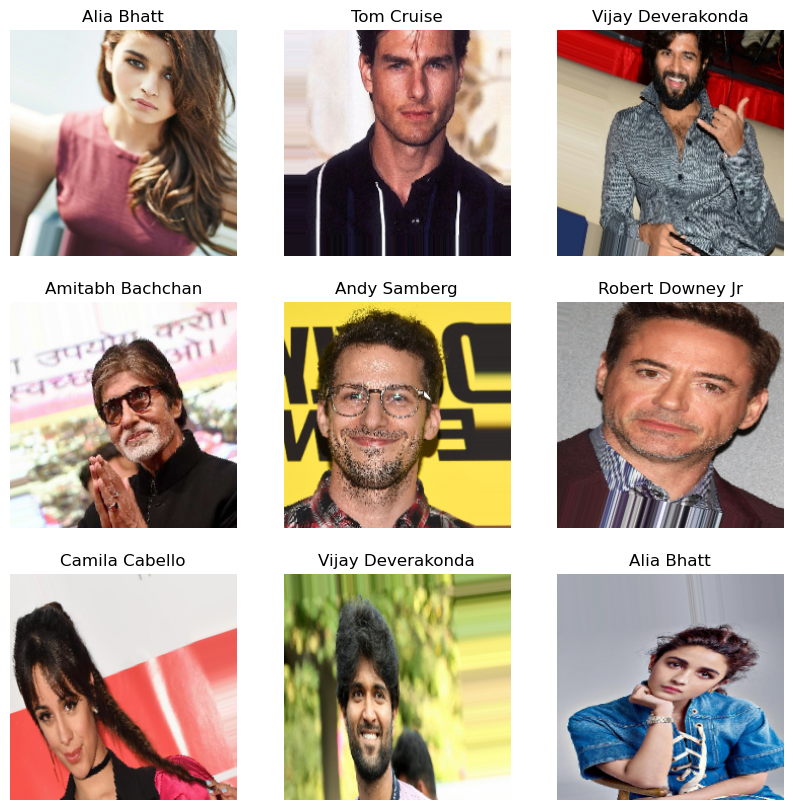

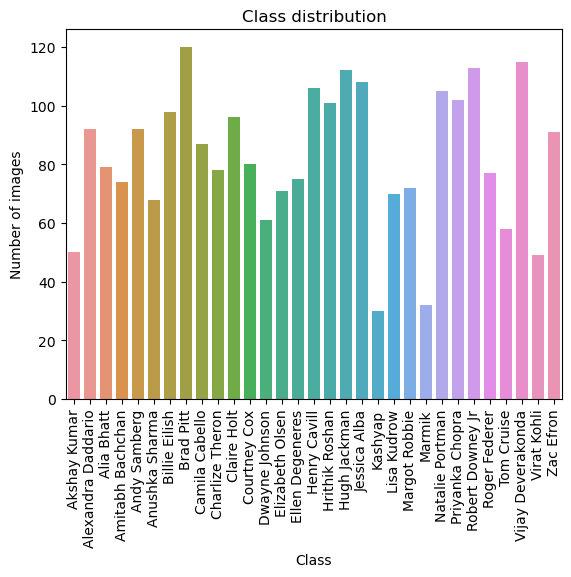

In [4]:
# Data Visualization and Analysis
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import seaborn as sns

# Define directories
train_dir = r"C:\Users\kcrav\FaceRecognition\Original Images"

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Get class names
classes = list(train_ds.class_indices.keys())

# Visualize some images with their labels
def plot_images_with_labels(dataset, classes, num_images=9):
    images, labels = next(dataset)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(classes[int(labels[i])])
        plt.axis('off')
    plt.show()

plot_images_with_labels(train_ds, classes)

# Analyze class distribution
def plot_class_distribution(dataset, class_names):
    # Get the class indices
    class_indices = dataset.class_indices
    # Count the number of images in each class
    class_counts = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names]
    sns.barplot(x=class_names, y=class_counts)
    plt.xticks(rotation=90)
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.title('Class distribution')
    plt.show()

plot_class_distribution(train_ds, classes)


Found 2562 images belonging to 31 classes.


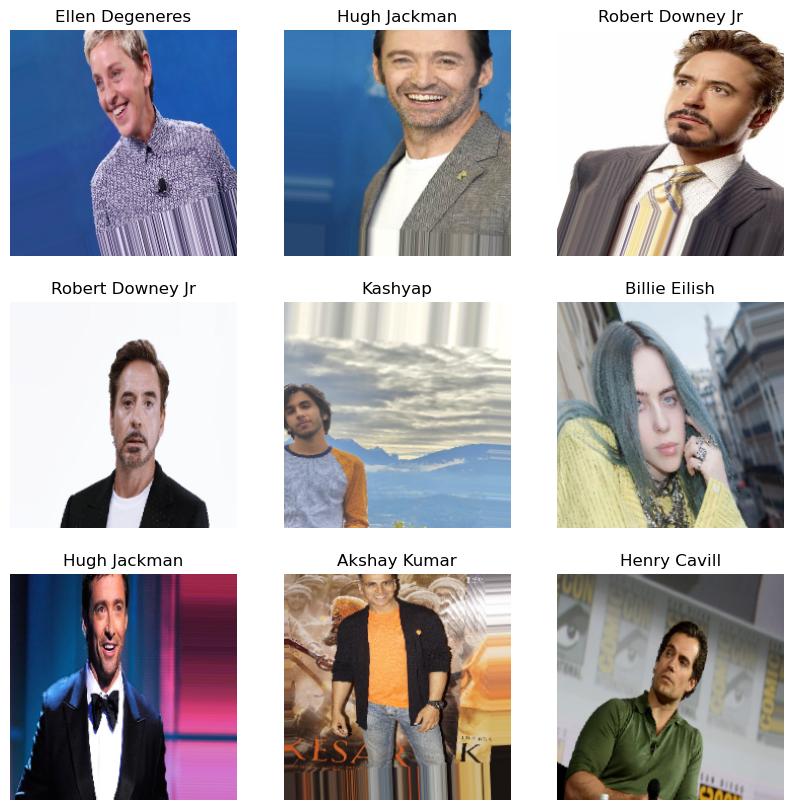

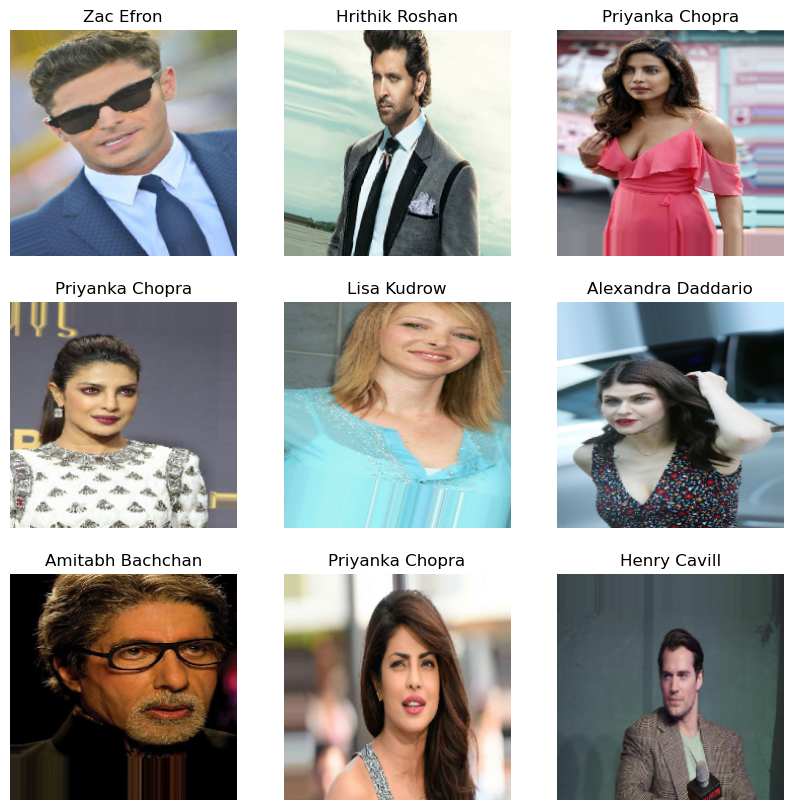

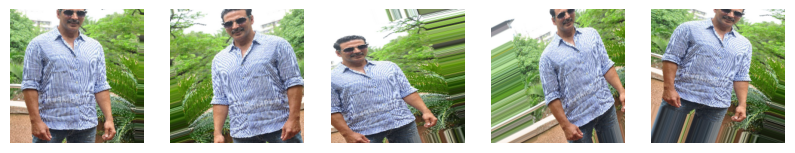

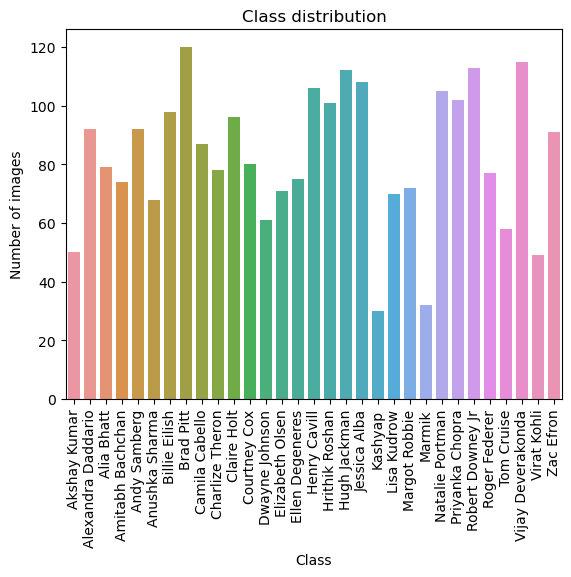

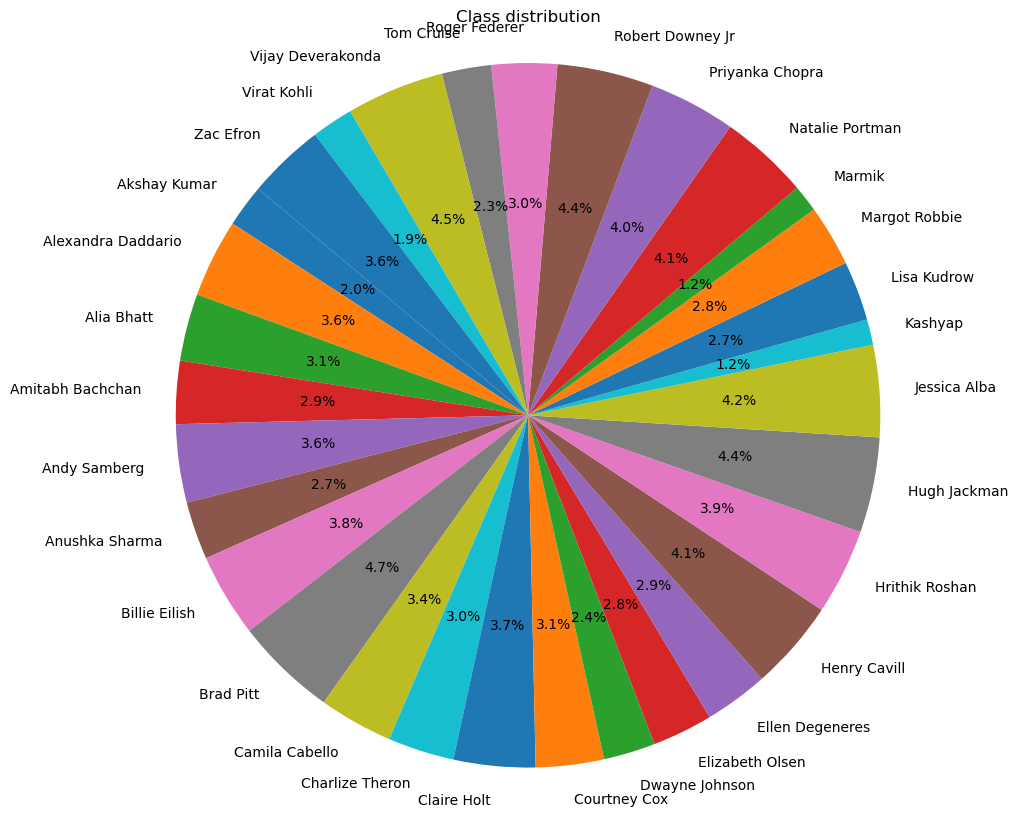

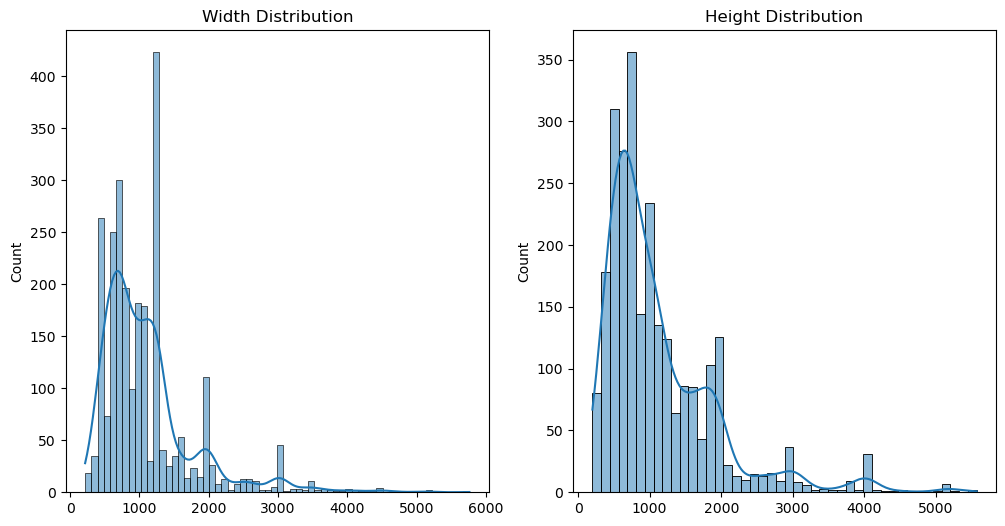

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import seaborn as sns
from random import randint

# Define directories
train_dir = r"C:\Users\kcrav\FaceRecognition\Original Images"
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Get class names
classes = list(train_ds.class_indices.keys())

# Visualize some images with their labels
def plot_images_with_labels(dataset, classes, num_images=9):
    images, labels = next(dataset)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(classes[int(labels[i])])
        plt.axis('off')
    plt.show()

# Display Random Images with Labels
def plot_random_images_with_labels(dataset, classes, num_images=9):
    images, labels = next(dataset)
    indices = np.random.choice(images.shape[0], num_images, replace=False)
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(classes[int(labels[idx])])
        plt.axis('off')
    plt.show()

# Show Image Augmentation Effects
def plot_augmentation_effects(image_path, generator, num_images=5):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    it = generator.flow(img_array, batch_size=1)
    
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        batch = next(it)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(batch[0])
        plt.axis('off')
    plt.show()

# Class Distribution as a Pie Chart
def plot_class_distribution_pie(dataset, class_names):
    class_counts = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names]
    plt.figure(figsize=(10, 10))
    plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
    plt.title('Class distribution')
    plt.axis('equal')
    plt.show()

# Image Size Distribution
def plot_image_size_distribution(dataset):
    image_shapes = []
    for root, dirs, files in os.walk(train_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(root, file)
                img = image.load_img(img_path)
                image_shapes.append(img.size)
    
    widths, heights = zip(*image_shapes)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(widths, kde=True)
    plt.title('Width Distribution')
    plt.subplot(1, 2, 2)
    sns.histplot(heights, kde=True)
    plt.title('Height Distribution')
    plt.show()

# Call the visualization functions
plot_images_with_labels(train_ds, classes)
plot_random_images_with_labels(train_ds, classes)
plot_augmentation_effects(os.path.join(train_dir, os.listdir(train_dir)[0], os.listdir(os.path.join(train_dir, os.listdir(train_dir)[0]))[0]), train_datagen)
plot_class_distribution(train_ds, classes)
plot_class_distribution_pie(train_ds, classes)
plot_image_size_distribution(train_ds)


In [40]:
train_dir=r"C:\Users\kcrav\FaceRecognition\Original Images"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2562 images belonging to 31 classes.


In [41]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [42]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_15 (Ba  (None, 111, 111, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                      

In [43]:
history = model.fit(train_ds,epochs= 10, batch_size=32)

Epoch 1/10
81/81 [==============================] - 261s 3s/step - loss: 3.4590 - accuracy: 0.0902
Epoch 2/10
81/81 [==============================] - 215s 3s/step - loss: 2.7246 - accuracy: 0.2186
Epoch 3/10
81/81 [==============================] - 187s 2s/step - loss: 2.2424 - accuracy: 0.3259
Epoch 4/10
81/81 [==============================] - 176s 2s/step - loss: 1.9112 - accuracy: 0.4141
Epoch 5/10
81/81 [==============================] - 171s 2s/step - loss: 1.5512 - accuracy: 0.5320
Epoch 6/10
81/81 [==============================] - 200s 2s/step - loss: 1.3470 - accuracy: 0.5831
Epoch 7/10
81/81 [==============================] - 170s 2s/step - loss: 1.0197 - accuracy: 0.6936
Epoch 8/10
81/81 [==============================] - 176s 2s/step - loss: 0.8660 - accuracy: 0.7338
Epoch 9/10
81/81 [==============================] - 172s 2s/step - loss: 0.6232 - accuracy: 0.8216
Epoch 10/10
81/81 [==============================] - 167s 2s/step - loss: 0.4906 - accuracy: 0.8720


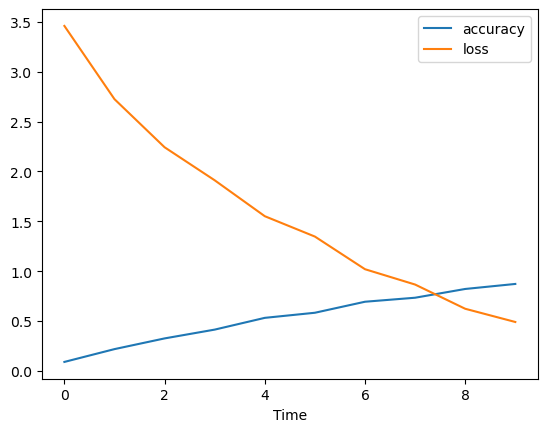

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [45]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

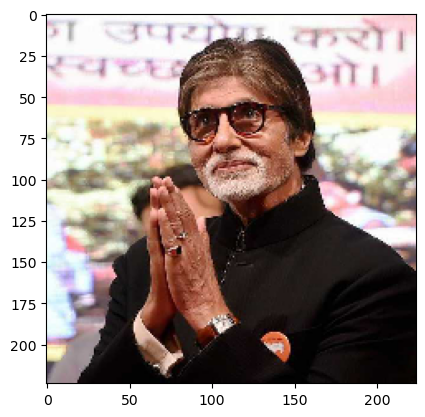

1/1 [==============================] - 1s 804ms/step
Actual: C:\Users\kcrav\FaceRecognition\Original Images\Amitabh Bachchan\Amitabh Bachchan
Predicted: Amitabh Bachchan


In [46]:
predict_image(r"C:\Users\kcrav\FaceRecognition\Original Images\Amitabh Bachchan\Amitabh Bachchan_71.jpg")

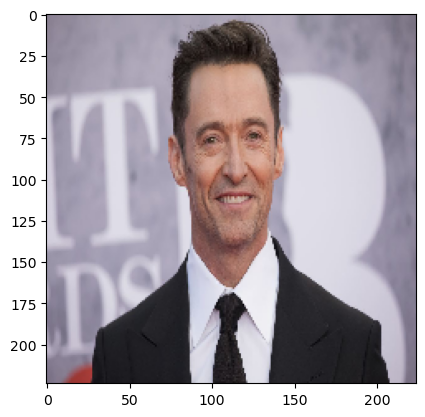

1/1 [==============================] - 0s 90ms/step
Actual: C:\Users\kcrav\FaceRecognition\Original Images\Hugh Jackman\Hugh Jackman
Predicted: Hugh Jackman


In [47]:
predict_image(r"C:\Users\kcrav\FaceRecognition\Original Images\Hugh Jackman\Hugh Jackman_84.jpg")